<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/sampling_and_standard_error___temperatures_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelando o comportamento da temperatura nos EUA ao longo do tempo**

No conjunto de dados analisado a seguir, '`tempetures.csv`', estão registradas as temperaturas altas e baixas diárias para 21 cidades dos EUA, cobrindo quase todo país, exceto Alasca e Havaí. A partir dos dados históricos de muitos anos, entre 1961 a 2015, há 421.848 observações.

## **Importância da Independência na Amostragem Aleatória**

Em diversas áreas do conhecimento, como pesquisas eleitorais, estudos científicos e análises de mercado, é comum recorrer à amostragem para obter informações sobre uma população.

Na **amostragem aleatória simples** cada membro da população tem a mesma chance de ser selecionado, é um método frequentemente utilizado. Na **amostragem probabilística** cada membro da população tem uma chance diferente de zero de ser incluído na amostra E na **amostragem estratificada**, a população é dividida em subgrupos, e amostras aleatórias são retiradas de cada subgrupo proporcionalmente ao seu tamanho. No entanto, a validade da inferência estatística depende crucialmente da escolha de amostras aleatórias independentes.

**Problema**: como fazer inferências precisas sobre uma população com base em uma única amostra, sem realizar múltiplas amostras e calcular intervalos de confiança?

Este estudo, que busca estimar a temperatura média nos EUA a partir de dados de diferentes cidades, ilustra os desafios da amostragem.  Utilizando um método que seleciona amostras consecutivas de um arquivo organizado por cidade,  viola-se a suposição de independência. Afinal, temperaturas de uma mesma cidade tendem a ser mais semelhantes entre si do que temperaturas de cidades diferentes.

Essa correlação entre as amostras gera um viés na estimativa do erro padrão e afeta os intervalos de confiança, podendo levar a conclusões equivocadas sobre a temperatura média da população.  Vale ressaltar que o Teorema do Limite Central,  ferramenta fundamental para a inferência a partir de amostras,  tem sua aplicação comprometida quando a independência entre as amostras não é garantida.

Portanto, a escolha de um método de amostragem adequado, que assegure a independência entre as observações, é essencial para garantir a validade das conclusões e a confiabilidade da inferência estatística.

## **Importando e instalando as bibliotecas**

In [141]:
!pip install requests pandas numpy

In [158]:
# Importando as bibliotecas
import random
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

## **Obtendo os dados de temperaturas no EUA de um arquivo CSV** (*online*)

In [143]:
df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/temperatures.csv")

# Imprime o número de linhas e colunas dentro do try block
print("Número de linhas e colunas:", df.shape)

# Imprime os nomes das colunas/variáveis dentro do try block
print("Variáveis:", df.columns.tolist())

# display dentro do try
display(df.head(15))

Número de linhas e colunas: (421848, 3)
Variáveis: ['CITY', 'TEMP', 'DATE']


,CITY,TEMP,DATE
0,SEATTLE,3.10,19610101
1,SEATTLE,0.55,19610102
2,SEATTLE,0.00,19610103
3,SEATTLE,4.45,19610104
4,SEATTLE,8.35,19610105
5,SEATTLE,6.70,19610106
6,SEATTLE,9.70,19610107
7,SEATTLE,7.20,19610108
8,SEATTLE,9.45,19610109
9,SEATTLE,10.30,19610110


In [144]:
def getHighs():
    """
    Lê os dados de temperaturas de um arquivo CSV e retorna os valores extraídos.
    Parâmetros:
    - Nenhum.
    Retorno:
    - population: Lista de temperaturas máximas extraídas do arquivo.
    """
    inFile = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/temperatures.csv")
    population = inFile['TEMP'].tolist()    # Lista para armazenar as temperaturas
    for l in inFile['TEMP']:  # Lê linha por linha do arquivo
        try:
            # tempC = float(l.split(',')[1])  # Extrai o segundo valor da linha (temperatura)
            population.append(float(1))  # Adiciona a temperatura à lista
        except:
            continue  # Ignora linhas mal formatadas ou vazias

    return population  # Retorna a lista de temperaturas

## **Amostragem aleatória simples usando `Random`**

O objetivo inicial desta análise é aplicação da amostragem aleatória simples para estimar a temperatura média nos EUA usando a biblioteca `random` de modo a se garantir a validade das inferências a partir de uma única amostra.

## **Método: comparação de resultdos obtidos entre amostra aleatória vs. população**

A função `getMeansAndSDs` calcula as médias e desvios padrões para uma população e uma amostra, usando a biblioteca numpy, em seguida, são exibidos os histogramas das distribuições e impressas as estatísticas no console, ao se ativar o modo `verbose=True`.

Apesar da amostra aleatória gerada pelafunção `random.sample(population, 100)` ser pequena (100 pontos de dados) em relação à população (421.848), a média e o desvio padrão da amostra se aproximam da média e desvio padrão da população.

Média populacional = 8.649384730993024
Desvio padrão da população = 10.151199062477724
Média amostral = 6.912499999999999
Desvio padrão amostral = 9.046616425493013


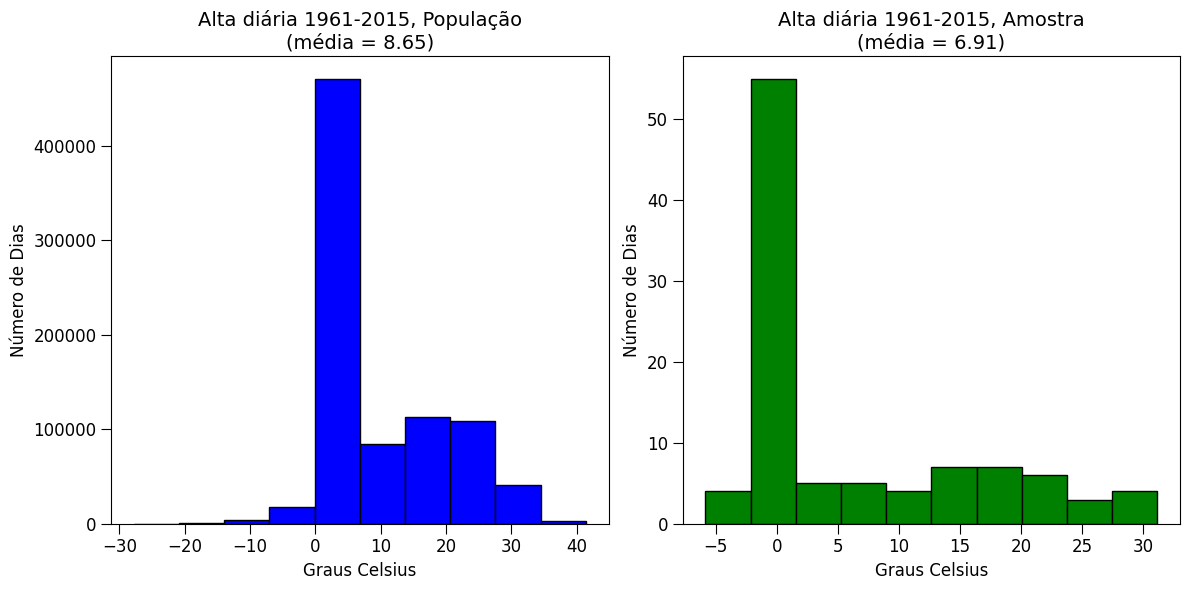

<Figure size 640x480 with 0 Axes>

In [145]:
def getMeansAndSDs(population, sample, verbose=True):
    """
    Calcula as médias e desvios padrões de uma população e de uma amostra.
    Opcionalmente, gera histogramas para ambas.

    Parâmetros:
    - population: Lista com os dados da população.
    - sample: Lista com os dados da amostra.
    - verbose: (opcional) Booleano indicando se os histogramas devem ser exibidos.

    Retorna:
    - popMean: Média da população.
    - sampleMean: Média da amostra.
    - popSD: Desvio padrão da população.
    - sampleSD: Desvio padrão da amostra.
    """
    # Calcula a média da população e da amostra
    popMean = sum(population) / len(population)
    sampleMean = sum(sample) / len(sample)

    # Se verbose for True, exibe histogramas e estatísticas
    if verbose:
        # Cria uma figura com dois subplots lado a lado
        fig, axes = pylab.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

        # Gera o histograma da população no primeiro subplot
        axes[0].hist(population, edgecolor='black', color='blue')
        axes[0].set_title('Alta diária 1961-2015, População\n' +
                          '(média = ' + str(round(popMean, 2)) + ')')
        axes[0].set_xlabel('Graus Celsius')
        axes[0].set_ylabel('Número de Dias')

        # Gera o histograma da amostra no segundo subplot
        axes[1].hist(sample, edgecolor='black', color='green')
        axes[1].set_title('Alta diária 1961-2015, Amostra\n' +
                          '(média = ' + str(round(sampleMean, 2)) + ')')
        axes[1].set_xlabel('Graus Celsius')
        axes[1].set_ylabel('Número de Dias')

        # Ajusta o layout para evitar sobreposição
        pylab.tight_layout()

        # Exibe as médias e desvios padrões
        print('Média populacional =', popMean)
        print('Desvio padrão da população =', numpy.std(population))
        print('Média amostral =', sampleMean)
        print('Desvio padrão amostral =', numpy.std(sample))

    # Retorna as estatísticas calculadas
    return popMean, sampleMean, numpy.std(population), numpy.std(sample)

# Configura a semente para reprodutibilidade
random.seed(0)

# Obtém os dados da população
population = getHighs()

# Seleciona uma amostra aleatória de x elementos da população
# A função random.sample retorna uma lista contendo uma amostra de elementos escolhidos aleatoriamente da população
sample = random.sample(population, 100)

# Calcula e exibe as estatísticas, incluindo histogramas
# True chama o Get Mean e Standard Deviations de modo detalhado para gerar um histograma
getMeansAndSDs(population, sample, True)

# Mostra a figura com os subplots
pylab.figure()
pylab.show()

Os cálculos comparam a média populacional com a média amostral, o mesmo para os dois desvios padrão, ambos não estão muito disferentes. O que significa que a amostra gerada aleatoriamente não distoa, significativamente, em relação aos dados da população. Ao se ampliar o parâmetro na função `random.sample`para gerar uma amostra aleatória maior, cai a diferença.

## **Utilizando e comparando os resultados de múltiplas amostras aleatórias**

A seguir vamos avaliar a consistência de amostras aleatórias extraídas da  população ("*temperatures*"), monitorando as diferenças estatísticas entre amostras e a população. O foco é aprofundar a análise da amostragem aleatória simples para estimar a temperatura média nos EUA.

O objetivo é responder à questão: a aproximação entre a média e o desvio padrão da amostra em relação à população é um acaso ou um resultado esperado?

Para responder a essa pergunta, um experimento computacional será apresentado com o intuito de explorar o que acontece quando comparamos **1.000 amostras** aleatórias de **tamanho 200**, extraídas da população de temperaturas.

O histograma a seguir mostra a distribuição das médias das amostras e a linha vertical destaca a média real da população. A distribuição das médias amostrais se aproxima de uma distribuição normal, confirmando o **Teorema do Limite Central**.
A visualização gerada tem como intuito facilitar a análise da precisão e confiabilidade das estimativas amostrais.

In [146]:
# Configurações visuais para gráficos usando pylab
pylab.rcParams['lines.linewidth'] = 2  # Largura das linhas nos gráficos
pylab.rcParams['axes.titlesize'] = 14  # Tamanho da fonte dos títulos
pylab.rcParams['axes.labelsize'] = 12  # Tamanho da fonte dos rótulos
pylab.rcParams['xtick.labelsize'] = 12  # Tamanho da fonte nos ticks do eixo X
pylab.rcParams['ytick.labelsize'] = 12  # Tamanho da fonte nos ticks do eixo Y
pylab.rcParams['xtick.major.size'] = 7  # Tamanho dos ticks principais no eixo X
pylab.rcParams['ytick.major.size'] = 7  # Tamanho dos ticks principais no eixo Y
pylab.rcParams['lines.markersize'] = 10  # Tamanho dos marcadores nos gráficos
pylab.rcParams['legend.numpoints'] = 1  # Número de exemplos mostrados na legenda

def makeHist(data, title, xlabel, ylabel):
    """
    Gera e exibe um histograma com os dados fornecidos.

    Parâmetros:
    - data: Lista de valores a serem plotados.
    - title: Título do gráfico.
    - xlabel: Rótulo do eixo X.
    - ylabel: Rótulo do eixo Y.
    - bins: Número de divisões no histograma (padrão: 20).

    Retorno:
    - Nenhum. O gráfico é exibido diretamente.
    """
    pylab.hist(data, bins=20, edgecolor = 'black')  # Cria o histograma com os dados
    pylab.title(title)  # Define o título
    pylab.xlabel(xlabel)  # Define o rótulo do eixo X
    pylab.ylabel(ylabel)  # Define o rótulo do eixo Y

Média das médias amostrais = 8.708
Desvio padrão das médias amostrais = 0.727
Diferença máxima entre as médias da população e das amostras = 2.572
Diferença máxima entre os desvios padrões da população e das amostras = 1.727
Simulação 1: fração fora do intervalo de confiança de 95% = 0.065
Simulação 2: fração fora do intervalo de confiança de 95% = 0.964


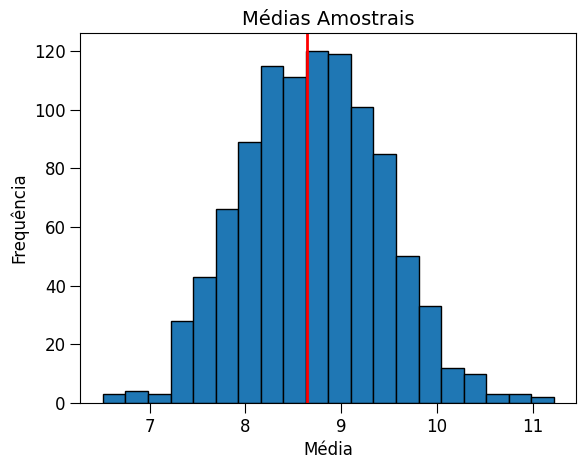

In [147]:
def getMeansAndSDs(population, sample, verbose=False):
    """
    Calcula as médias e desvios padrões da população e de uma amostra.
    Também pode exibir gráficos e informações detalhadas se verbose=True.

    Parâmetros:
    - population: Lista representando a população.
    - sample: Lista representando a amostra.
    - verbose: (opcional) Booleano que controla a exibição de gráficos e detalhes.

    Retorna:
    - popMean: Média da população.
    - sampleMean: Média da amostra.
    - popSD: Desvio padrão da população.
    - sampleSD: Desvio padrão da amostra.
    """
    popMean = sum(population) / len(population)
    sampleMean = sum(sample) / len(sample)

    if verbose:
        # Exibe histogramas da população e da amostra
        makeHist(population,
                 'Alta diária 1961-2015, População\n' +
                 '(média = ' + str(round(popMean, 2)) + ')',
                 'Graus Celsius', 'Número de Dias')
        pylab.figure()
        makeHist(sample,
                 'Alta diária 1961-2015, Amostra\n' +
                 '(média = ' + str(round(sampleMean, 2)) + ')',
                 'Graus Celsius', 'Número de Dias')

        # Exibe as médias e desvios padrões
        print('Média populacional =', popMean)
        print('Desvio padrão da população =', numpy.std(population))
        print('Média amostral =', sampleMean)
        print('Desvio padrão amostral =', numpy.std(sample))

    return popMean, sampleMean, numpy.std(population), numpy.std(sample)

# Configura a semente para reprodutibilidade
random.seed(0)

# Obtém a população a partir dos dados
population = getHighs()

# Média da população
popMean = sum(population) / len(population)

# Define tamanho da amostra e número de amostras
sampleSize = 200
numSamples = 1000

# Contador de casos fora do intervalo de confiança
numBad = 0

# Inicializa variáveis para monitorar diferenças máximas
maxMeanDiff = 0
maxSDDiff = 0
sampleMeans = []

# Realiza amostras repetidas da população
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD = getMeansAndSDs(population, sample, verbose=False)
    sampleMeans.append(sampleMean)

    # Calcula a maior diferença entre as médias
    if abs(popMean - sampleMean) > maxMeanDiff:
        maxMeanDiff = abs(popMean - sampleMean)

    # Calcula a maior diferença entre os desvios padrões
    if abs(popSD - sampleSD) > maxSDDiff:
        maxSDDiff = abs(popSD - sampleSD)

# Exibe os resultados
print('Média das médias amostrais =', round(sum(sampleMeans) / len(sampleMeans), 3))
print('Desvio padrão das médias amostrais =', round(numpy.std(sampleMeans), 3))
print('Diferença máxima entre as médias da população e das amostras =', round(maxMeanDiff, 3))
print('Diferença máxima entre os desvios padrões da população e das amostras =', round(maxSDDiff, 3))

# Define numTrials antes de ser usado no loop
numTrials = 1000  # Ajuste o número de ensaios conforme necessário

# Simulação 1: Amostras aleatórias simples
for t in range(numTrials):
    sample = random.sample(population, sampleSize)  # Seleciona uma amostra aleatória
    sampleMean = sum(sample) / sampleSize  # Calcula a média da amostra
    se = numpy.std(sample) / sampleSize**0.5  # Calcula o erro padrão da média (SEM)

    # Verifica se a média populacional está fora do intervalo de confiança
    if abs(popMean - sampleMean) > 1.96 * se:
        numBad += 1
print('Simulação 1: fração fora do intervalo de confiança de 95% =', numBad / numTrials)

# Simulação 2: Amostras consecutivas em série
numBad = 0  # Reinicializa o contador
for t in range(numTrials):
    posStartingPts = range(0, len(population) - sampleSize)  # Posições válidas para início da amostra
    start = random.choice(posStartingPts)  # Escolhe um ponto inicial aleatório
    sample = population[start:start + sampleSize]  # Seleciona uma amostra consecutiva
    sampleMean = sum(sample) / sampleSize  # Calcula a média da amostra
    se = numpy.std(sample) / sampleSize**0.5  # Calcula o erro padrão da média (SEM)

    # Verifica se a média populacional está fora do intervalo de confiança
    if abs(popMean - sampleMean) > 1.96 * se:
        numBad += 1
print('Simulação 2: fração fora do intervalo de confiança de 95% =', numBad / numTrials)

# Gera um histograma das médias das amostras
makeHist(sampleMeans, 'Médias Amostrais', 'Média', 'Frequência')
pylab.axvline(x=popMean, color='r')

## **Averiguação da precisão com o crescimento da amostra aleatória**

A seguir será demonstrado como o aumento do tamanho da amostra aleatória reduz o erro nas estimativas das médias amostrais.

O código a seguir tem por objetivo gerar um gráfico que relaciona o tamanho das amostras aleatórias (eixo x) com a média das médias amostrais (eixo y), com barras de erro representando o intervalo de confiança de 95%.

Essa visualização ajuda a entender como o tamanho da amostra afeta a precisão das estimativas das médias amostrais em relação à média populacional.

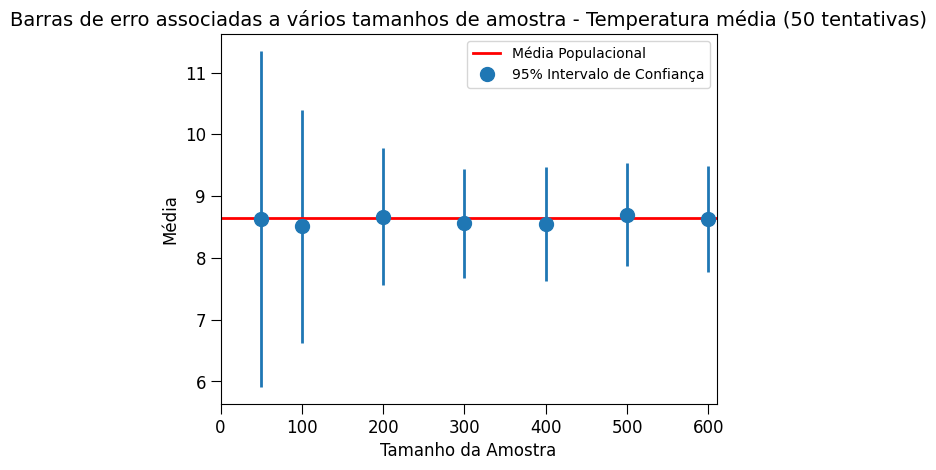

<Figure size 640x480 with 0 Axes>

In [148]:
def showErrorBars(population, sizes, numTrials):
    """
    Gera gráficos com barras de erro para avaliar a relação entre tamanho da amostra
    e precisão estatística (erro padrão) ao calcular médias amostrais.

    Parâmetros:
    - population: Lista representando os dados da população.
    - sizes: Lista contendo diferentes tamanhos de amostras para avaliação.
    - numTrials: Número de experimentos realizados para cada tamanho de amostra.

    Retorna:
    - Um gráfico com a média amostral e barras de erro (intervalos de confiança).
    """
    xVals = []  # Armazena os tamanhos das amostras (eixo x)
    sizeMeans = []  # Médias das amostras para cada tamanho
    sizeSDs = []  # Desvios padrão das médias das amostras

    # Itera pelos diferentes tamanhos de amostra
    for sampleSize in sizes:
        xVals.append(sampleSize)
        trialMeans = []  # Armazena as médias das amostras para um tamanho específico

        # Realiza experimentos para o tamanho da amostra
        for t in range(numTrials):
            sample = random.sample(population, sampleSize)  # Seleciona uma amostra aleatória
            popMean, sampleMean, popSD, sampleSD = getMeansAndSDs(population, sample)
            trialMeans.append(sampleMean)

        # Calcula a média das médias das amostras e o desvio padrão
        sizeMeans.append(sum(trialMeans) / len(trialMeans))
        sizeSDs.append(numpy.std(trialMeans))

    # Gera o gráfico com barras de erro (intervalo de confiança de 95%)
    pylab.errorbar(xVals, sizeMeans,
                   yerr=1.96 * pylab.array(sizeSDs),  # Calcula o intervalo de confiança
                   fmt='o', label='95% Intervalo de Confiança')

    # Configurações do gráfico
    pylab.title('Barras de erro associadas a vários tamanhos de amostra - Temperatura média (' + str(numTrials) + ' tentativas)')
    pylab.xlabel('Tamanho da Amostra')
    pylab.ylabel('Média')
    pylab.axhline(y=popMean, color='r', label='Média Populacional')  # Linha para a média da população
    pylab.xlim(0, sizes[-1] + 10)  # Ajusta os limites do eixo x
    pylab.legend()
    pylab.figure()  # Abre uma nova figura

# Dados da população
population = getHighs()

# Chamada da função com diferentes tamanhos de amostra
showErrorBars(population, [50, 100, 200, 300, 400, 500, 600], 50)

Note que tamanho das barras de erro ficam consistentemente menores devido ao aumento das amostras. Em outras palavras, amostras pequenas têm barras de erro serão maiores, indicando maior incerteza; nas amostras maiores as barras de erro diminuirão, demostrando maior precisão.

**Gráfico**:
* **Eixo X**: Tamanhos de amostras testados (50, 100, 200, ..., 600).
* **Eixo Y**: Médias das médias das amostras.
* **Barras de Erro**: Intervalos de confiança de 95% ao redor de cada média.
* **Linha Vermelha**: Média da população, para referência.


## **Comparando as curvas de Erro Padrão Médio (teórico) vs. os Desvios Padrão das Médias Amostrais**

Agora façamos uma breve recaptulação sobre o **Teorema do Limite Central**, em que três pontos são importantes destacar:

1. As médias das amostras em um conjunto de amostras, as chamadas médias amostrais, serão aproximadamente normalmente distribuídas, independentemente da distribuição da população;
2. esta distribuição normal terá uma média próxima à média da população; e
3. a variância das médias amostrais será próxima à variância da população dividida pelo tamanho da amostra.

Em suma, o **Teorema do Limite Central** é fundamental, pois garante que a média das amostras será normalmente distribuída, próxima à média da população e com variância próxima à da população dividida pelo tamanho da amostra.

Como sabemos, o desvio padrão é a raiz quadrada da variância, isso significa que o desvio padrão da amostra deve ser próximo ao desvio padrão da população. Assim, podemos usar esse conceito para derivar algo chamado Erro Padrão da Média ou *Standard Error of the Mean* (SEM).

Para tamanhos de amostra pequenos, o Erro Padrão da Média ou *Standard Error of the Mean* (SEM) e o desvio padrão real podem diferir mais, devido à maior variabilidade. Por outro lado, à medida que o tamanho da amostra aumenta, o desvio padrão das médias das amostras converge para o SEM teórico, mostrando maior precisão na estimativa da média populacional.

Neste ensaio, vamos utilizar vários tamanhos de amostra, variando de 25 a 600, serão 50 ensaios para cada tamanho de amostra. Com base nesses 50 ensaios, podemos realmente gerar um verdadeiro desvio padrão. E então podemos comparar o Erro Padrão Médio com o dos desvios padrão reais.

Text(0, 0.5, 'Desvio Padrão')

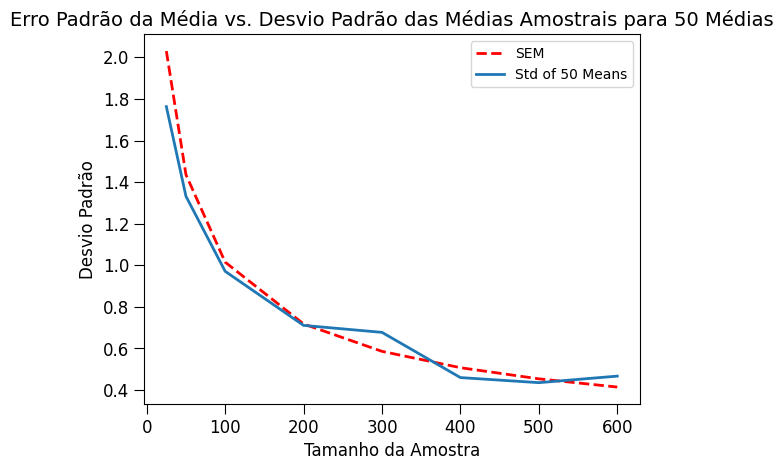

In [149]:
def sem(popSD, sampleSize):
    """
    Calcula o Erro Padrão da Média (SEM - Standard Error of the Mean).

    Fórmula:
        SEM = popSD / sqrt(sampleSize)

    Parâmetros:
    - popSD: Desvio padrão da população.
    - sampleSize: Tamanho da amostra.

    Retorna:
    - O erro padrão da média (SEM) para o tamanho de amostra fornecido.
    """
    return popSD / sampleSize**0.5

# Configurações iniciais
sampleSizes = [25, 50, 100, 200, 300, 400, 500, 600]  # Tamanhos das amostras
numTrials = 50  # Número de experimentos por tamanho de amostra
population = getHighs()  # Obtém os dados da população
popSD = numpy.std(population)  # Calcula o desvio padrão da população

# Listas para armazenar os resultados
sems = []  # Lista para armazenar os erros padrão da média (SEM)
sampleSDs = []  # Lista para armazenar os desvios padrão das médias das amostras

# Iteração pelos diferentes tamanhos de amostra
for size in sampleSizes:
    # Calcula o SEM teórico para o tamanho da amostra
    sems.append(sem(popSD, size))

    # Inicializa a lista para armazenar as médias amostrais
    means = []

    # Realiza experimentos para calcular médias amostrais
    for t in range(numTrials):
        sample = random.sample(population, size)  # Seleciona uma amostra aleatória
        means.append(sum(sample) / len(sample))  # Calcula a média da amostra

    # Calcula o desvio padrão das médias amostrais e armazena
    sampleSDs.append(numpy.std(means))

# Geração do gráfico
pylab.plot(sampleSizes, sems, 'r--', label='SEM')  # Plota o SEM teórico
pylab.plot(sampleSizes, sampleSDs, label='Std of 50 Means')  # Plota os desvios padrão reais
pylab.title('Erro Padrão da Média vs. Desvio Padrão das Médias Amostrais para 50 Médias')
pylab.legend(loc='best')  # Localiza a legenda automaticamente
pylab.xlabel('Tamanho da Amostra')
pylab.ylabel('Desvio Padrão')


Como podemos ver no gráfico, o Erro Padrão da Média (teórico), a linha pontilhada vermelha, rastreia o desvio padrão das 50 médias notavelmente bem.

**Gráfico**
* **Eixo X**: Tamanho das amostras (25, 50, 100, ..., 600).
* **Eixo Y**: Valores do SEM e do desvio padrão das médias amostrais.
* **Linha vermelha tracejada**, representa o Erro Padrão da Média ou *Standard Error of the Mean* (SEM) teórico.
* **Linha azul sólida**, representa os desvios padrão reais das médias amostrais.

## **Visualização das diferenças percentuais entre os desvios padrão das amostras e o desvio padrão da população**

Pense no erro padrão como uma estimativa do desvio padrão da amostra. Como você pode ver, a fórmula para calcular o erro padrão é notavelmente simples. Nós meramente pegamos o desvio padrão da população e o dividimos pela raiz quadrada do tamanho da amostra.

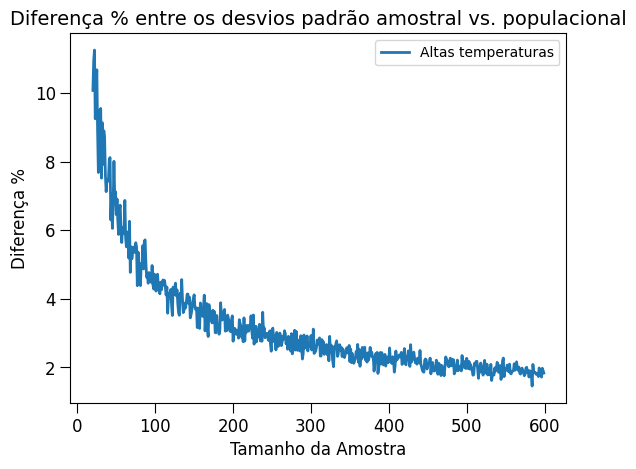

In [150]:
def getDiffs(population, sampleSizes):
    """
    Calcula as diferenças percentuais médias entre o desvio padrão da população
    e os desvios padrão das amostras para diferentes tamanhos de amostras.

    Parâmetros:
    - population: Lista representando os dados da população.
    - sampleSizes: Lista de tamanhos de amostra para os quais as diferenças serão calculadas.

    Retorna:
    - Uma lista (array) contendo as diferenças percentuais médias em relação ao desvio padrão da população.
    """
    popStd = numpy.std(population)  # Desvio padrão da população
    diffsFracs = []  # Lista para armazenar as diferenças percentuais

    # Itera sobre os tamanhos das amostras
    for sampleSize in sampleSizes:
        diffs = []  # Lista para armazenar as diferenças para um tamanho de amostra específico

        # Realiza 100 experimentos para cada tamanho de amostra
        for _ in range(100):
            sample = random.sample(population, sampleSize)  # Seleciona uma amostra aleatória
            sampleStd = numpy.std(sample)  # Calcula o desvio padrão da amostra
            diffs.append(abs(popStd - sampleStd))  # Calcula a diferença absoluta

        # Calcula a diferença percentual média para o tamanho de amostra atual
        diffMean = sum(diffs) / len(diffs)
        diffsFracs.append(diffMean / popStd)  # Normaliza pela população e armazena

    return pylab.array(diffsFracs) * 100  # Converte para porcentagem

def plotDiffs(sampleSizes, diffs, title, label):
    """
    Gera um gráfico das diferenças percentuais entre os desvios padrão
    das amostras e o desvio padrão da população.

    Parâmetros:
    - sampleSizes: Lista de tamanhos de amostra usados no experimento.
    - diffs: Lista de diferenças percentuais calculadas.
    - title: Título do gráfico.
    - label: Rótulo da linha no gráfico.
    """
    pylab.plot(sampleSizes, diffs, label=label)  # Plota as diferenças
    pylab.xlabel('Tamanho da Amostra')  # Rótulo do eixo X
    pylab.ylabel('Diferença %')  # Rótulo do eixo Y
    pylab.title(title)  # Título do gráfico
    pylab.legend()  # Exibe a legenda

# Configurações para o experimento
sampleSizes = range(20, 600, 1)  # Tamanhos de amostra variando de 20 a 599
diffs = getDiffs(getHighs(), sampleSizes)  # Calcula as diferenças
plotDiffs(sampleSizes, diffs, 'Diferença % entre os desvios padrão amostral vs. populacional', label='Altas temperaturas')

## **Explorando as distribuições de probabilidade: uniforme, normal (gaussiana) e exponencial**

A seguir examinaremos e recaptularemos, brevemente, as seguintes distribuições:
1. **Uniforme**, onde tudo é igualmente provável, todos os valores têm a mesma probabilidade de ocorrer, tendo sido gerada usando `random.random`;
2. **Normal (Gaussiana)**, os valores próximos à média têm maior probabilidade, curva em forma de sino, tendo sido gerada usando `random.gauss` com uma média de 0 e um desvio padrão de 1.
3. **Exponencial**, modela eventos que ocorrem de forma contínua e independente, tendo sido gerada usando `random.expovariate`, com parâmetro lambda de 0,5, a função exponencial cai muito rapidamente.

As duas primeiras distribuições, embora diferentes, são semelhantes no sentido de que são bastante simétricas em torno das médias. Em contraste, a exponencial é tudo, menos simétrica em torno da média, tendo a propriedade da inclinação.

A seguir, são gerados os três histogramas para visualização de cada distribuição.

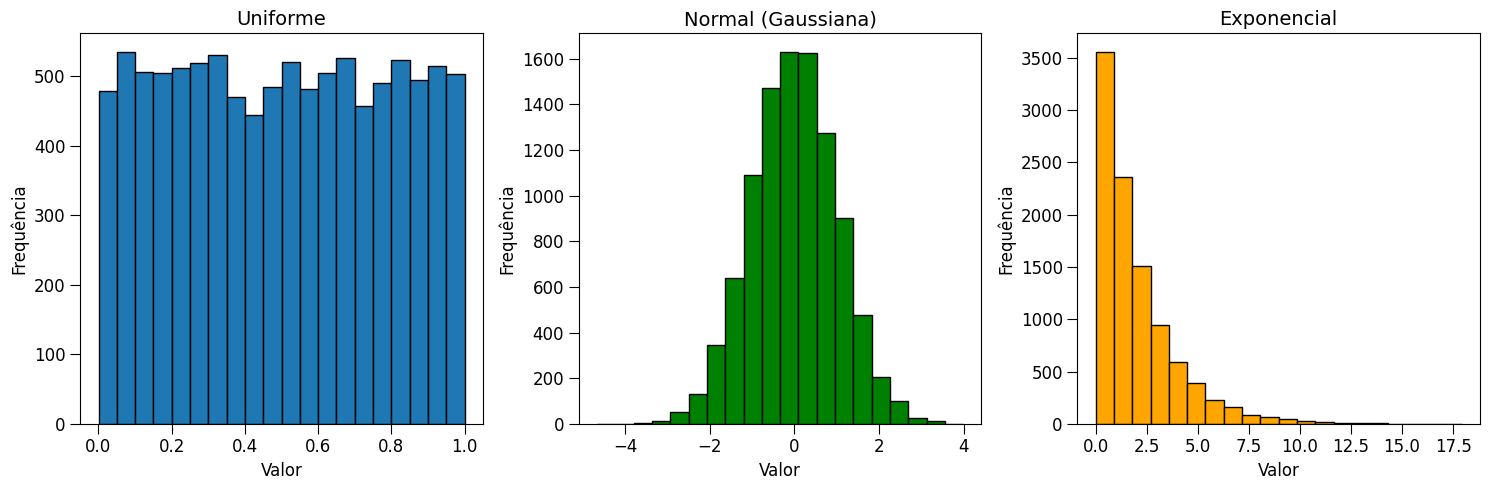

In [151]:
def plotDistributions():
    """
    Gera e plota histogramas para três distribuições de probabilidade diferentes:
    uniforme, normal (gaussiana) e exponencial.

    Funcionamento:
    - Gera 10.000 valores para cada distribuição.
    - Plota histogramas separados para visualizar a forma de cada distribuição.
    """
    # Inicializa listas para armazenar valores de cada distribuição
    uniform, normal, exp = [], [], []

    # Gera 10.000 valores para cada distribuição
    for i in range(10000):
        uniform.append(random.random())  # Distribuição uniforme [0, 1)
        normal.append(random.gauss(0, 1))  # Distribuição normal com média 0 e desvio padrão 1
        exp.append(random.expovariate(0.5))  # Distribuição exponencial com λ = 0.5

    # Cria uma figura com três subplots lado a lado
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plota o histograma da distribuição uniforme no primeiro subplot
    axes[0].hist(uniform, bins=20, edgecolor='black')
    axes[0].set_title('Uniforme')
    axes[0].set_xlabel('Valor')
    axes[0].set_ylabel('Frequência')

    # Plota o histograma da distribuição normal no segundo subplot
    axes[1].hist(normal, bins=20, edgecolor='black', color='green')
    axes[1].set_title('Normal (Gaussiana)')
    axes[1].set_xlabel('Valor')
    axes[1].set_ylabel('Frequência')

    # Plota o histograma da distribuição exponencial no terceiro subplot
    axes[2].hist(exp, bins=20, edgecolor='black', color='orange')
    axes[2].set_title('Exponencial')
    axes[2].set_xlabel('Valor')
    axes[2].set_ylabel('Frequência')

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()

    # Mostra a figura com os subplots
    plt.show()

# Chamada da função para gerar os gráficos
plotDistributions()

Nesta etapa iremos avaliar como o desvio padrão das amostras se aproxima do desvio padrão da população em diferentes distribuições e tamanhos de amostra,
comparando o comportamento para diferentes tamanhos de populações.


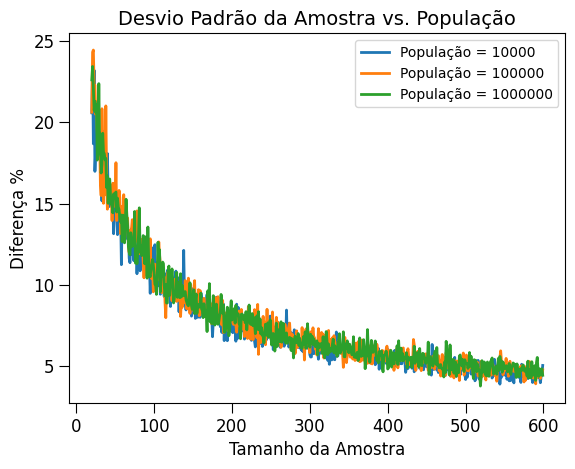

In [152]:
def compareDists():
    """
    Compara as diferenças entre os desvios padrão das amostras e das populações
    para três distribuições: uniforme, normal e exponencial.

    Gera gráficos para avaliar como o desvio padrão das amostras converge
    para o desvio padrão das populações conforme o tamanho da amostra aumenta.
    """
    # Inicializa listas para cada distribuição
    uniform, normal, exp = [], [], []

    # Gera 100.000 valores para cada distribuição
    for i in range(100000):
        uniform.append(random.random())  # Distribuição uniforme [0, 1)
        normal.append(random.gauss(0, 1))  # Distribuição normal com média 0 e desvio padrão 1
        exp.append(random.expovariate(0.5))  # Distribuição exponencial com λ = 0.5

    # Define os tamanhos das amostras
    sampleSizes = range(20, 600, 1)

    # Calcula as diferenças percentuais para cada distribuição
    udiffs = getDiffs(uniform, sampleSizes)  # Uniforme
    ndiffs = getDiffs(normal, sampleSizes)  # Normal
    ediffs = getDiffs(exp, sampleSizes)  # Exponencial

    # Plota as diferenças para cada distribuição
    plotDiffs(sampleSizes, udiffs, 'Desvio Padrão da Amostra vs. População', 'População Uniforme')
    plotDiffs(sampleSizes, ndiffs, 'Desvio Padrão da Amostra vs. População', 'População Normal')
    plotDiffs(sampleSizes, ediffs, 'Desvio Padrão da Amostra vs. População', 'População Exponencial')

# Comparação com diferentes tamanhos de populações
popSizes = (10000, 100000, 1000000)  # Diferentes tamanhos de populações
sampleSizes = range(20, 600, 1)  # Tamanhos de amostra

# Itera pelos diferentes tamanhos de população
for size in popSizes:
    population = []

    # Gera uma população para o tamanho atual
    for i in range(size):
        population.append(random.expovariate(0.5))  # Distribuição exponencial com λ = 0.5

    # Calcula as diferenças para o tamanho de população atual
    ediffs = getDiffs(population, sampleSizes)

    # Plota as diferenças
    plotDiffs(sampleSizes, ediffs, 'Desvio Padrão da Amostra vs. População',
              'População = ' + str(size))

## **Frequência com que as médias amostrais extrapolam o intervalo de confiança de 95%**

* **Simulação 1: Amostras Aleatórias Simples**
Para cada experimento:
1. Seleciona uma amostra aleatória da população usando `random.sample`.
2. Calcula a média da amostra e o erro padrão da média (SEM).
3. Verifica se a diferença entre a média da população e a média da amostra excede o intervalo de confiança: ∣𝑝𝑜𝑝𝑀𝑒𝑎𝑛 − 𝑠𝑎𝑚𝑝𝑙𝑒𝑀𝑒𝑎𝑛∣ > 1.96 × 𝑆𝐸𝑀
4. Incrementa o contador numBad se a condição for satisfeita.

* **Simulação 2: Amostras Consecutivas em Série**
Modifica o método de seleção da amostra:
1. Seleciona um ponto de início aleatório na população.
2. Extrai uma amostra consecutiva com base no ponto inicial.
3. O restante do processo (média, SEM e verificação do intervalo de confiança) é idêntico à Simulação 1.

In [153]:
def getMeansAndSDs(population, sample, verbose=False):
    """
    Calcula a média e o desvio padrão de uma população e de uma amostra.

    Parâmetros:
    - population: lista contendo os dados populacionais.
    - sample: lista contendo os dados amostrais.
    - verbose: se True, exibe gráficos e valores calculados.

    Retorna:
    - Média da população, média da amostra, desvio padrão da população, desvio padrão da amostra.
    """
    popMean = sum(population) / len(population)  # Média da população
    sampleMean = sum(sample) / len(sample)  # Média da amostra

    if verbose:
        # Gera gráficos para população e amostra
        makeHist(
            population,
            'Temp. Máx. diária 1961-2015, População\n' +
            '(Média = ' + str(round(popMean, 2)) + ')',
            'Graus Celsius', 'Número de Dias'
        )
        pylab.figure()
        makeHist(
            sample,
            'Temp. Máx. diária 1961-2015, Amostra\n' +
            '(Média = ' + str(round(sampleMean, 2)) + ')',
            'Graus Celsius', 'Número de Dias'
        )
        # Exibe valores calculados
        print('Média populacional =', popMean)
        print('Desvio Padrão da População =', numpy.std(population))
        print('Média da amostra =', sampleMean)
        print('Desvio Padrão da Amostra =', numpy.std(sample))

    return popMean, sampleMean, numpy.std(population), numpy.std(sample)

# Configuração inicial
random.seed(0)  # Seta a semente para reprodutibilidade
temps = getHighs()  # Carrega os dados de temperatura
popMean = sum(temps) / len(temps)  # Calcula a média da população
sampleSize = 200  # Define o tamanho da amostra
numTrials = 10000  # Define o número de experimentos
numBad = 0  # Inicializa o contador de desvios

# Simulação 1: Amostras aleatórias simples
for t in range(numTrials):
    sample = random.sample(temps, sampleSize)  # Seleciona uma amostra aleatória
    sampleMean = sum(sample) / sampleSize  # Calcula a média da amostra
    se = numpy.std(sample) / sampleSize**0.5  # Calcula o erro padrão da média (SEM)

    # Verifica se a média populacional está fora do intervalo de confiança
    if abs(popMean - sampleMean) > 1.96 * se:
        numBad += 1

print('Fração fora do intervalo de confiança de 95% =', numBad / numTrials)

# Simulação 2: Amostras consecutivas em série
numBad = 0  # Reinicializa o contador

for t in range(numTrials):
    posStartingPts = range(0, len(temps) - sampleSize)  # Posições válidas para início
    start = random.choice(posStartingPts)  # Seleciona aleatoriamente um ponto inicial
    sample = temps[start:start + sampleSize]  # Seleciona uma amostra consecutiva
    sampleMean = sum(sample) / sampleSize  # Calcula a média da amostra
    se = numpy.std(sample) / sampleSize**0.5  # Calcula o erro padrão da média (SEM)

    # Verifica se a média populacional está fora do intervalo de confiança
    if abs(popMean - sampleMean) > 1.96 * se:
        numBad += 1

print('Fração fora do intervalo de confiança de 95% =', numBad / numTrials)

Fração fora do intervalo de confiança de 95% = 0.0538
Fração fora do intervalo de confiança de 95% = 0.965


## **Avaliando a Capacidade de Generalização de um Modelo: tipos de validação cruzada**

A escolha da complexidade adequada para um modelo é fundamental ao buscar ajustar uma curva aos dados. Quando há uma teoria que explica os dados utilizados, ela pode servir como base para definir o grau do modelo. Porém, na ausência de uma teoria prévia, é essencial utilizar técnicas de validação cruzada para avaliar a performance de modelos com diferentes graus de complexidade.

### **Tipos de Validação Cruzada**

1. **Leave-One-Out (LOO)**  
   - Cada exemplo é deixado de fora uma vez: o modelo é treinado nos demais e testado no exemplo excluído.  
   - Vantagem: utiliza praticamente todo o conjunto de dados para treinamento.  
   - Limitação: pode ser computacionalmente custoso para conjuntos de dados grandes.

2. **K-Fold Cross-Validation**  
   - Os dados são divididos em \(k\) subconjuntos (ou *folds*).  
   - O modelo é treinado \(k\) vezes, cada vez deixando um subconjunto de fora para teste enquanto os demais são usados para treinamento.  
   - Vantagem: equilíbrio entre custo computacional e precisão da avaliação.  
   - Recomendação: um valor comum para \(k\) é 5 ou 10.

3. **Amostragem Aleatória Repetida** (*Repeated Random Sampling*)  
   - Divide os dados aleatoriamente em conjuntos de treinamento e teste, repetindo o processo várias vezes.  
   - Vantagem: fornece uma avaliação robusta ao repetir a divisão várias vezes.  
   - Limitação: pode introduzir variabilidade, dependendo das divisões feitas.

A validação cruzada é uma ferramenta poderosa para se avaliar a capacidade de generalização de um modelo, evitando *overfitting* (superajuste). Escolher o método de validação cruzada mais adequado depende do tamanho do conjunto de dados e dos recursos computacionais disponíveis.

In [154]:
class tempDatum(object):
    """
    Representa um registro de dados de temperatura.

    Atributos:
    - self.high: Temperatura máxima registrada.
    - self.year: Ano da temperatura registrada.
    """
    def __init__(self, s):
        """
        Inicializa os atributos a partir de uma string formatada.
        A string deve conter informações separadas por vírgulas.

        Parâmetro:
        - s: Uma string contendo dados formatados, ex.: "cidade,temperatura,ano".
        """
        info = s.split(',')
        self.high = float(info[1])  # Extrai a temperatura máxima
        self.year = int(info[2][0:4])  # Extrai o ano (primeiros 4 caracteres)

    def getHigh(self):
        """Retorna a temperatura máxima."""
        return self.high

    def getYear(self):
        """Retorna o ano do registro."""
        return self.year

In [155]:
def getTempData():
    inFile = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/temperatures.csv")
    data = []  # Lista para armazenar os objetos tempDatum
    for index, row in inFile.iterrows():
        try:
            # Cria um objeto tempDatum para cada linha e adiciona à lista
            temp_data = tempDatum(f"{row['CITY']},{row['TEMP']},{row['DATE']}")
            data.append(temp_data)
        except:
            continue  # Ignora linhas mal formatadas ou vazias

    return data  # Retorna a lista de objetos tempDatum

# Chama a função para obter os dados
data = getTempData()

# Extrai os dados de temperatura e ano
temperaturas = [item.getHigh() for item in data]
anos = [item.getYear() for item in data]

# Imprime os dados extraídos
print("Temperaturas:", temperaturas[:10]) # Mostra as primeiras 10 temperaturas
print("Anos:", anos[:10]) # Mostra os primeiros 10 anos

# criar um DataFrame pandas para exibir uma prévia
df = pd.DataFrame({'Temperatura': temperaturas, 'Ano': anos})
print(df.head())

Temperaturas: [3.1, 0.55, 0.0, 4.45, 8.35, 6.7, 9.7, 7.2, 9.45, 10.3]
Anos: [1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961]
   Temperatura   Ano
0         3.10  1961
1         0.55  1961
2         0.00  1961
3         4.45  1961
4         8.35  1961


## **Comportamento da temperatura média diária alta nos EUA ao longo do tempo**

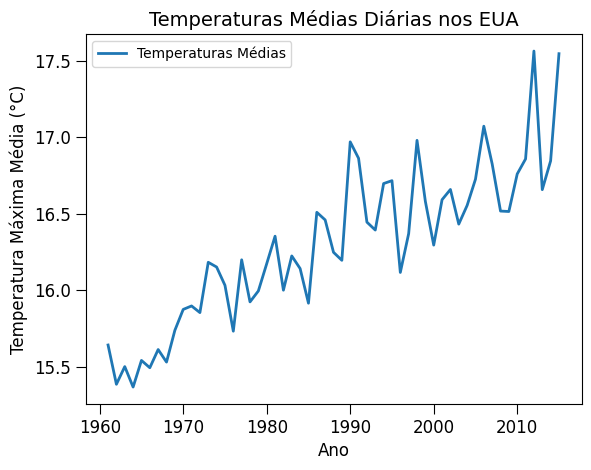

In [156]:
def getYearlyMeans(data):
    """
    Calcula as médias anuais de temperatura a partir dos dados fornecidos.

    Parâmetro:
    - data: Uma lista de objetos `tempDatum`.

    Retorna:
    - Um dicionário onde as chaves são anos e os valores são as médias anuais.
    """
    years = {}  # Dicionário para armazenar os dados por ano

    for d in data:
        try:
            # Adiciona a temperatura ao ano correspondente
            years[d.getYear()].append(d.getHigh())
        except:
            # Cria uma nova entrada para o ano, se necessário
            years[d.getYear()] = [d.getHigh()]

    # Calcula a média de temperatura para cada ano
    for y in years:
        years[y] = sum(years[y]) / len(years[y])
    return years

# Processamento dos dados e plotagem
data = getTempData()  # Lê os dados do arquivo CSV
years = getYearlyMeans(data)  # Calcula as médias anuais

xVals, yVals = [], []  # Listas para armazenar os valores de X (anos) e Y (médias)

# Prepara os valores para o gráfico
for e in years:
    xVals.append(e)  # Adiciona o ano
    yVals.append(years[e])  # Adiciona a média anual correspondente

# Cria o gráfico
if len(xVals) > 0 and len(yVals) > 0:
    plt.plot(xVals, yVals, label="Temperaturas Médias")
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Máxima Média (°C)')
    plt.title('Temperaturas Médias Diárias nos EUA')
    plt.legend()
    plt.show()
else:
    print("Erro: xVals ou yVals está vazio.")

A análise visual do gráfico de dispersão dos dados brutos, sugere uma tendência linear crescente.

## **Usando a validação cruzada para escolher o melhor grau de modelo (1, 2 ou 3)**

### **Função splitData**

A função `splitData` divide meio-a-meio os dados em subconjuntos de **treino** e **teste **de forma aleatória. A função `random.sample` é usada para selecionar índices aleatórios.

**Parâmetros**:
* `numSubsets`: define o número de subconjuntos para a validação cruzada (10 subconjuntos0.
* `dimensions`: especifica os graus dos modelos polinomiais (1, 2 e 3).

**Processo de Validação Cruzada**

Após a divisão dos dados em subconjuntos de treino e teste, modelos polinomiais são ajustados aos dados de treino com graus especificados em `dimensions`. Para cada modelo ajustado os valores estimados (previsões) são calculados para o conjunto de teste.

A utilização da validação cruzada com múltiplas divisões dos dados (10 subconjuntos) aumenta a confiabilidade dos resultados, pois reduz o risco de obter um resultado enganoso devido a uma única divisão desfavorável.

**Critérios para Escolha do Melhor Modelo**

Os coeficientes de determinação 𝑅2 são calculados para se avaliar a precisão de cada modelo, sendo armazenados para análise posterior.

Após a execução dos subconjuntos, as métricas 𝑅2 são analisadas:
* A média (𝜇) de 𝑅2 é calculada para cada grau.
* O desvio padrão (𝜎) de 𝑅2 é calculado para cada grau.

Esses dois parâmetros ajudam a avaliar qual modelo (dimensionalidade) melhor se ajusta aos dados.
1. **Média (𝜇) de 𝑅2**: representa o ajuste médio do modelo aos dados, quanto maior, melhor o modelo captura a variação dos dados.
2. **Desvio Padrão (𝜎) de 𝑅2**: mede a consistência dos resultados em diferentes subconjuntos, quanto menor, mais consistente é o modelo.

In [159]:
def splitData(xVals, yVals):
    """
    Divide os dados em conjuntos de treino e teste de forma aleatória.

    Args:
    - xVals: Lista de valores de entrada (eixo X).
    - yVals: Lista de valores correspondentes de saída (eixo Y).

    Retorna:
    - trainX: Lista de valores de entrada para o conjunto de treino.
    - trainY: Lista de valores de saída para o conjunto de treino.
    - testX: Lista de valores de entrada para o conjunto de teste.
    - testY: Lista de valores de saída para o conjunto de teste.
    """
    toTrain = random.sample(range(len(xVals)), len(xVals) // 2)
    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

def rSquared(observed, predicted):
    """
    Calcula o R² (coeficiente de determinação).
    """
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/np.var(observed))

# Configuração dos parâmetros
numSubsets = 10  # Número de subconjuntos para treino/teste
dimensions = (1, 2, 3)  # Dimensionalidade dos modelos de regressão
rSquares = {}  # Armazena os valores de R² para cada dimensionalidade
for d in dimensions:
    rSquares[d] = []

# Executa a validação cruzada
for _ in range(numSubsets):
    trainX, trainY, testX, testY = splitData(xVals, yVals)
    for d in dimensions:
        # Ajusta um modelo polinomial de grau d aos dados de treino
        model = pylab.polyfit(trainX, trainY, d)
        estVals = pylab.polyval(model, trainX)  # Previsões para o treino
        estVals = pylab.polyval(model, testX)  # Previsões para o teste
        rSquares[d].append(rSquared(testY, estVals))  # Calcula R² e armazena

# Calcula e imprime as métricas de R²
print("Média dos R-quadrados para dados de teste")
for d in dimensions:
    mean = round(sum(rSquares[d]) / len(rSquares[d]), 4)
    sd = round(np.std(rSquares[d]), 4)
    print(f'Para dimensionalidade {d}, média (𝜇) de R² = {mean}, desvio padrão (𝜎) de R²  = {sd}')

# Exibe os valores de R² para o grau 1
print(rSquares[1])

Média dos R-quadrados para dados de teste
Para dimensionalidade 1, média (𝜇) de R² = 0.7371, desvio padrão (𝜎) de R²  = 0.0406
Para dimensionalidade 2, média (𝜇) de R² = 0.728, desvio padrão (𝜎) de R²  = 0.0446
Para dimensionalidade 3, média (𝜇) de R² = 0.7292, desvio padrão (𝜎) de R²  = 0.0476
[0.7275988929516641, 0.6974081493808404, 0.6471466841658061, 0.7204604278365893, 0.7408650889174877, 0.7481353366626926, 0.7945836297739155, 0.7833205430185831, 0.765237457145284, 0.7459616730683929]


Com base nos resultados acima, o **modelo linear (dimensionalidade 1)** é o melhor para modelar os dados de altas temperatura dos EUA, pois apresenta a maior média de 𝑅2, indicando melhor ajuste médio aos dados, e o menor desvio padrão, indicando maior consistência.

* **Maior R² médio:** o modelo linear apresenta o maior valor médio de R² (0.7371) em comparação com os modelos de dimensionalidade 2 (0.728) e 3 (0.7232),  indicando que este modelo explica melhor a variabilidade nos dados de teste.

* **Desvio padrão:** o desvio padrão do R² no modelo linear (0.0406) é relativamente baixo, indicando que o modelo é consistente em diferentes subconjuntos de dados.

O modelo linear a melhor escolha para modelar os dados de temperatura, apresentando, neste caso, equilíbrio entre capacidade de explicação, simplicidade e consistência.